In [1]:
# USING LINEAR REGRESSION 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Took help from chat-gpt
# List of encodings to try
encodings = ['utf-8', 'latin1', 'iso-8859-1']

# Try reading the CSV file using different encodings
for encoding in encodings:
    try:
        df = pd.read_csv('ToyotaCorolla.csv', encoding=encoding)
        # If successful, break the loop
        break
    except UnicodeDecodeError:
        print(f"Attempted encoding '{encoding}' failed.")

# If the loop completes without success
else:
    print("Unable to read the file using any of the specified encodings.")

# Now, 'df' should contain the DataFrame if the CSV was successfully read


Attempted encoding 'utf-8' failed.


In [3]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


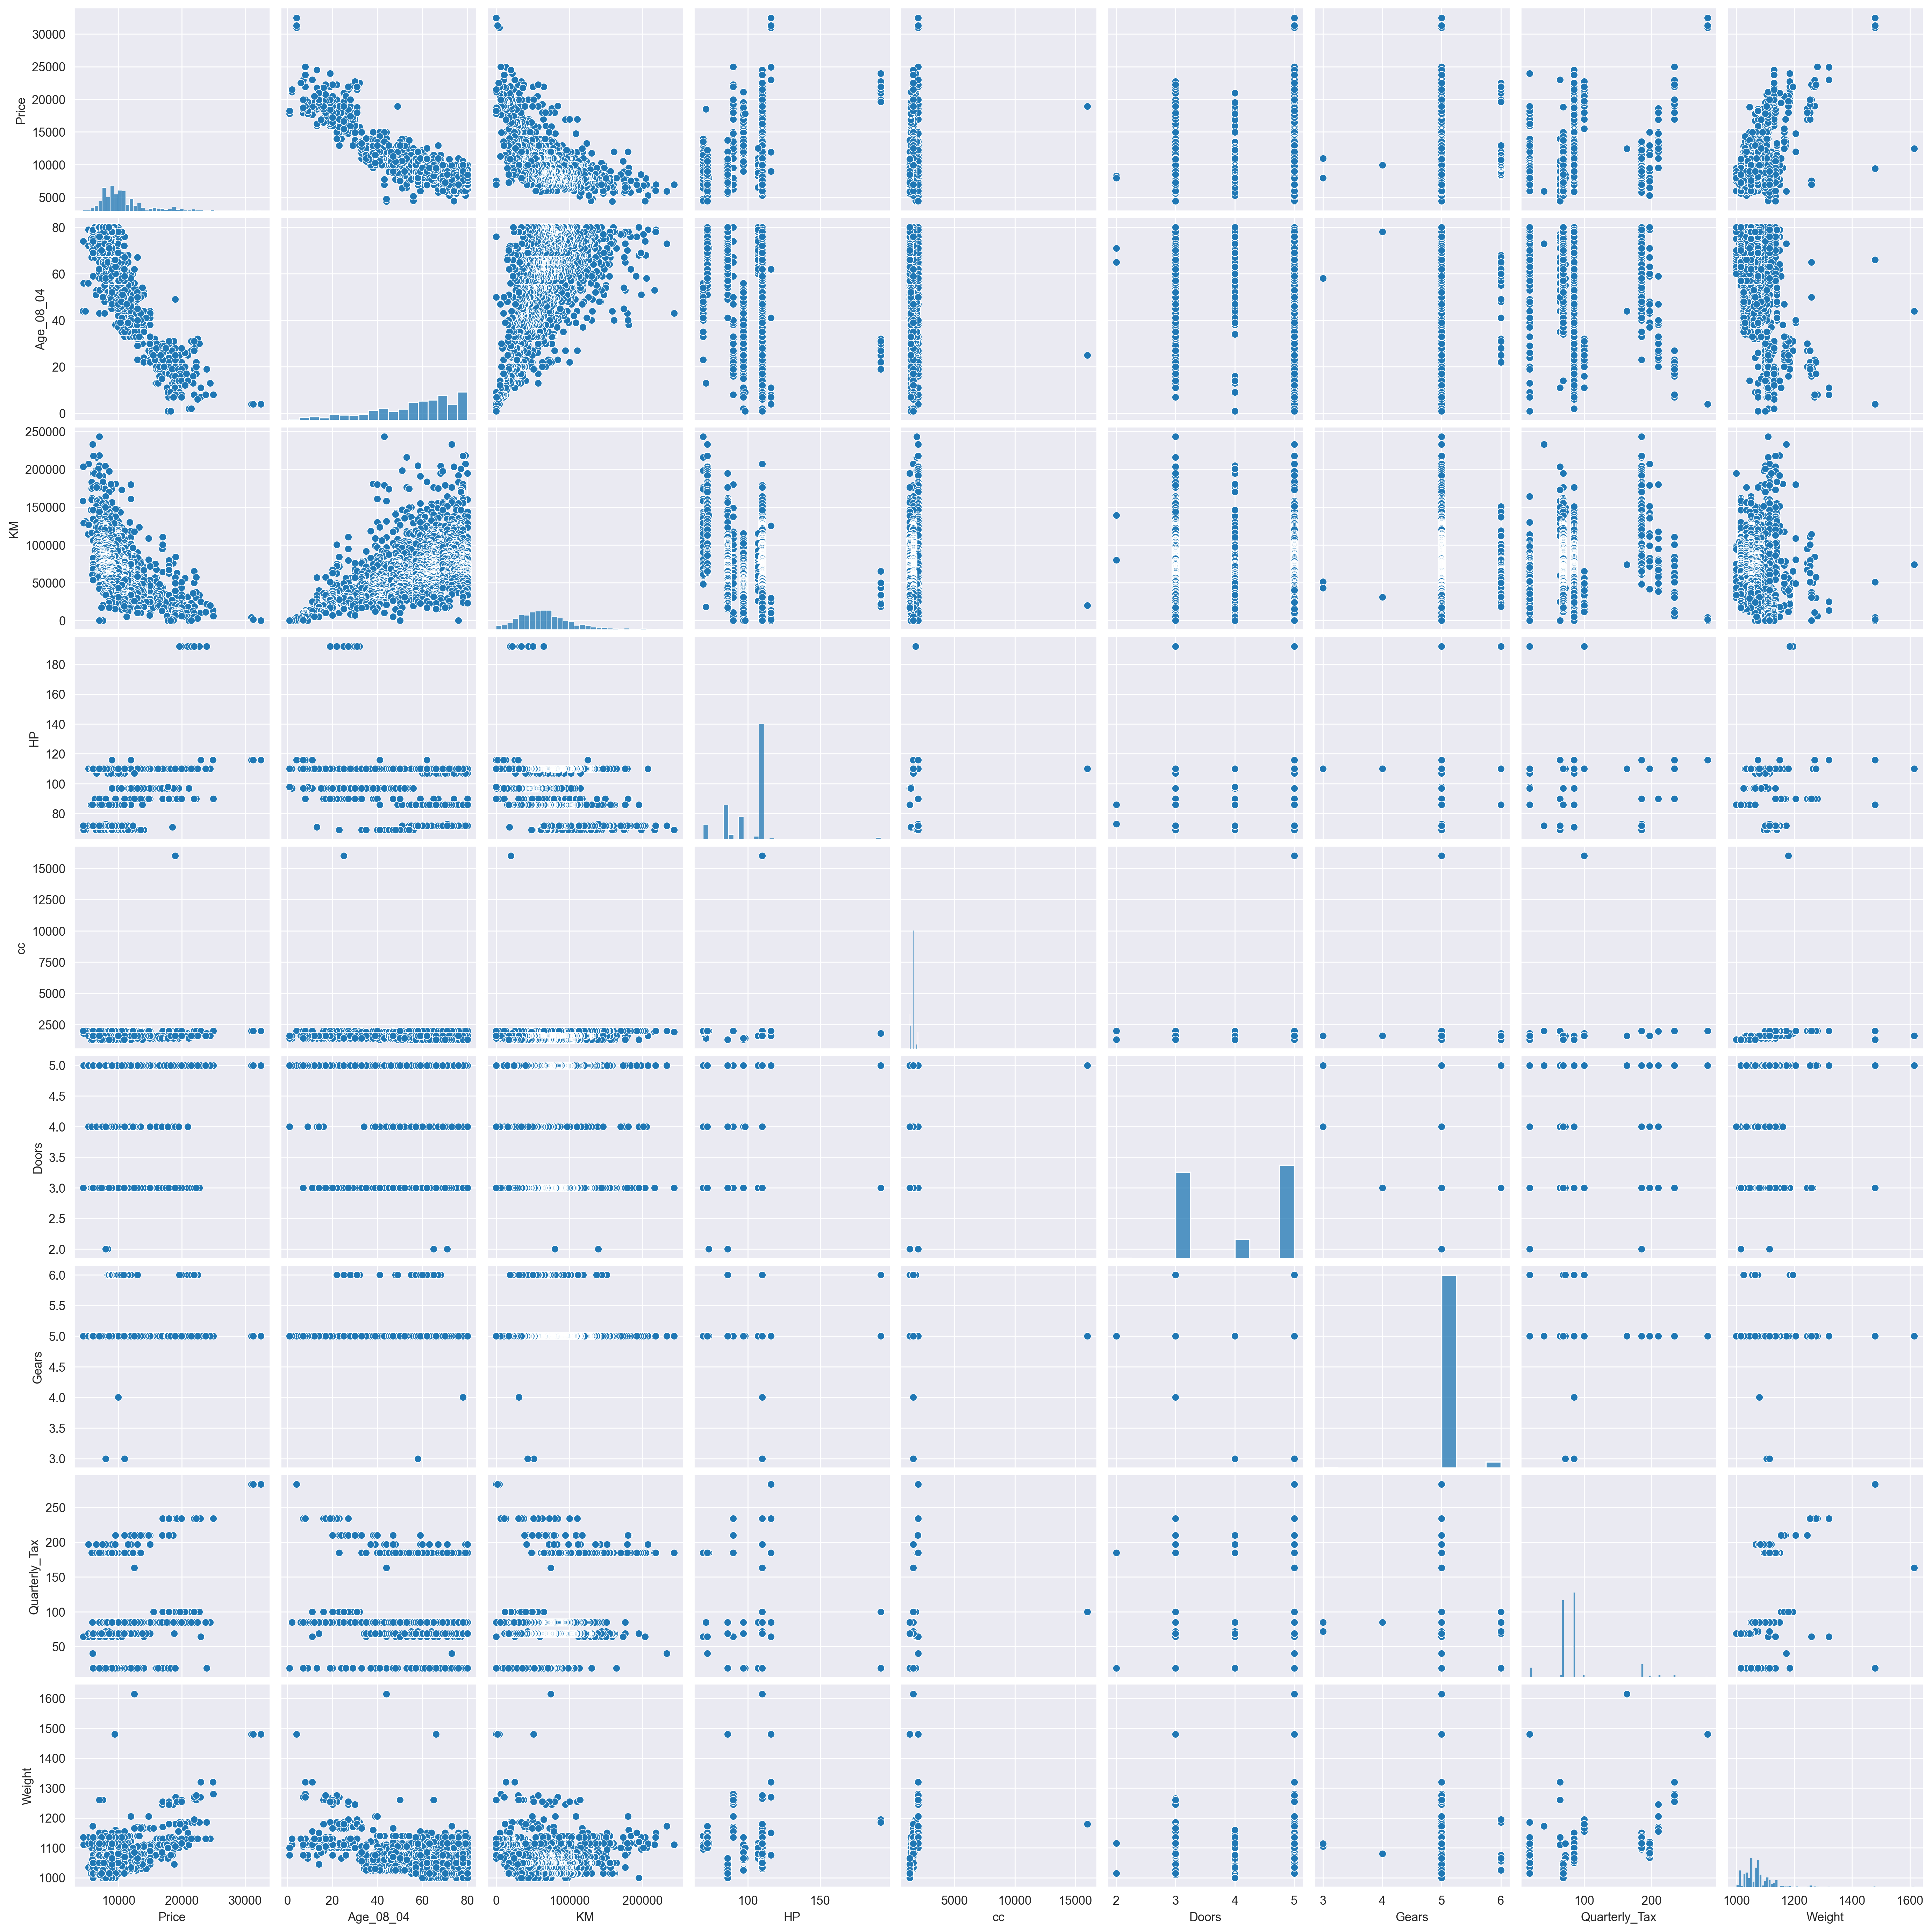

In [7]:
sns.pairplot(data)

<Axes: >

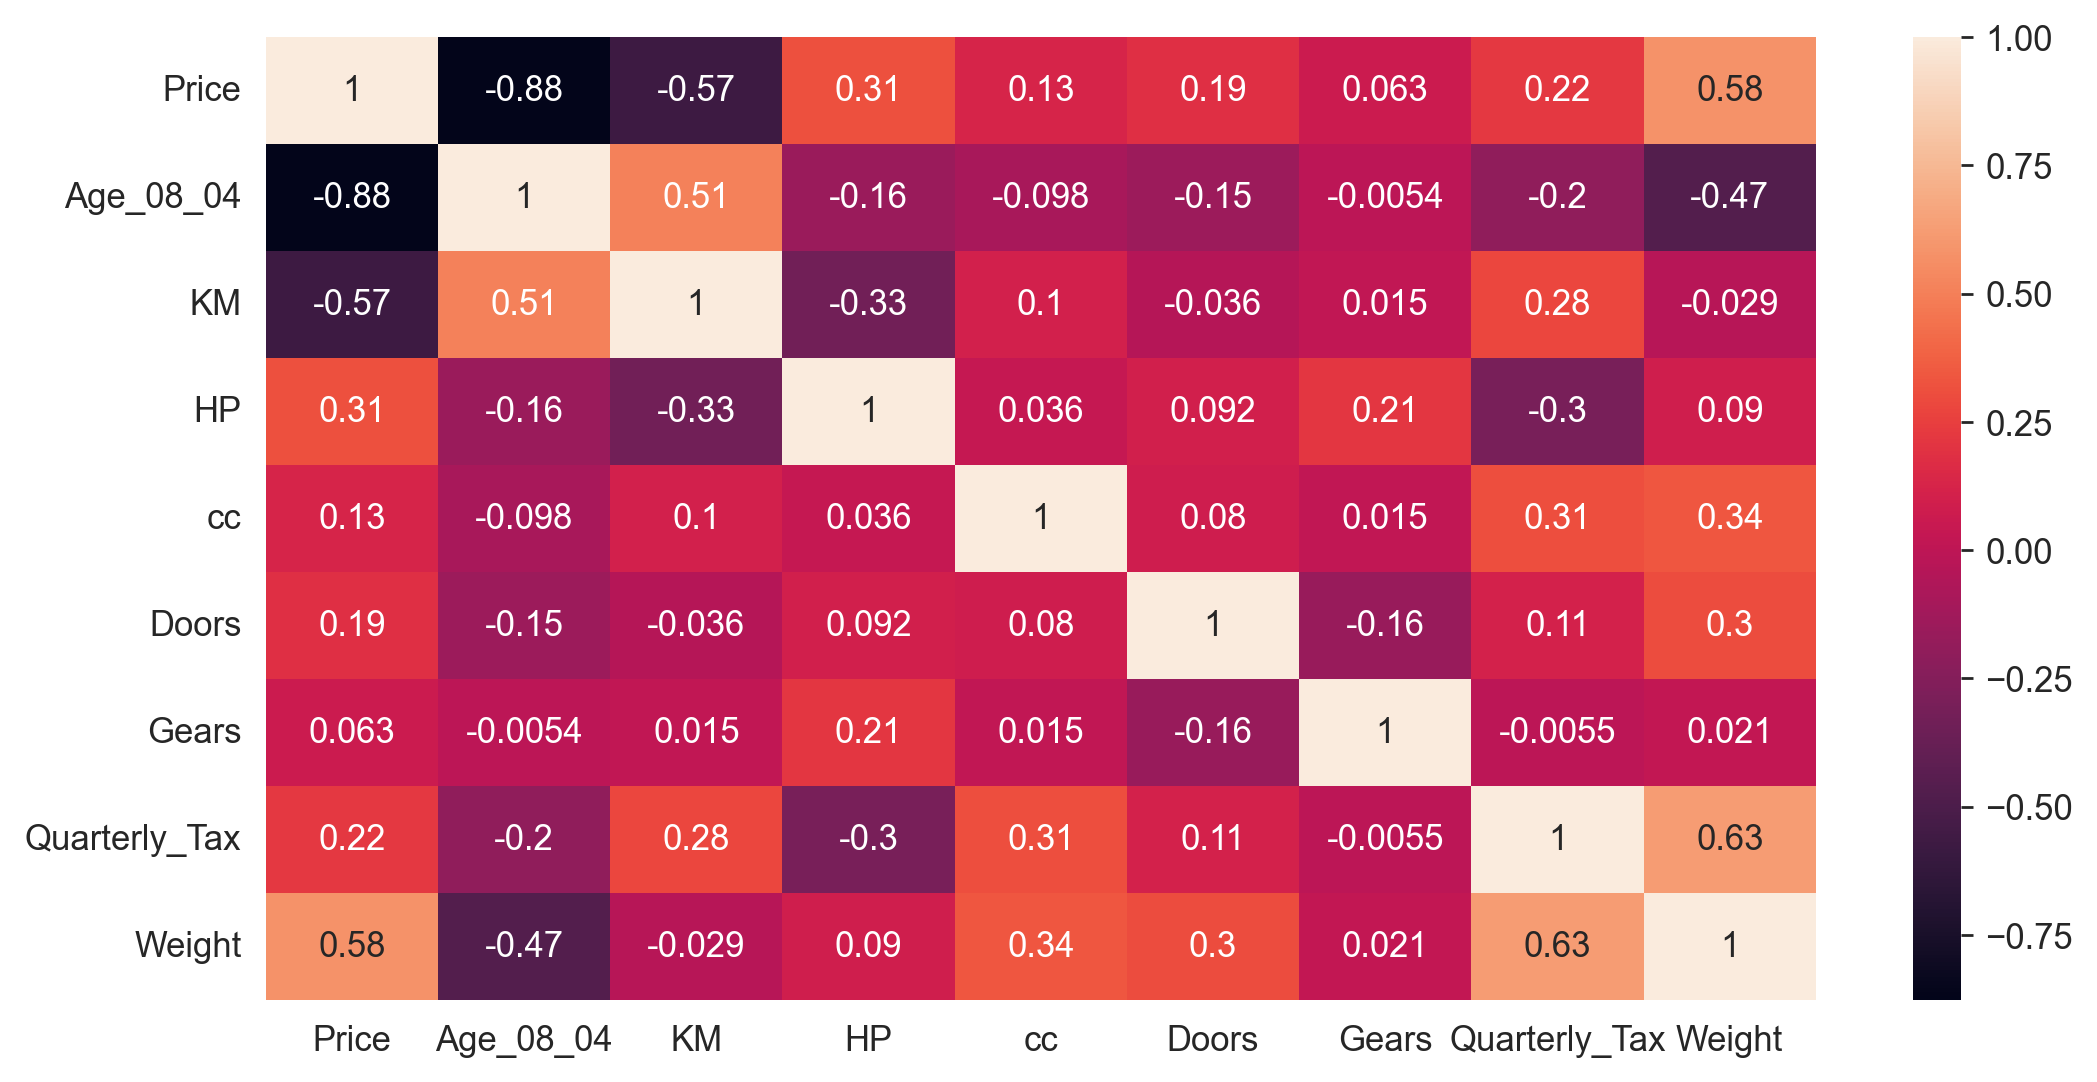

In [8]:
sns.heatmap(data.corr(),annot=True)

In [18]:
 # Model Building
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
x = data.drop(columns="Price")
y = data['Price']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [29]:
lr.coef_

array([-1.21320641e+02, -2.01353093e-02,  2.95093022e+01, -7.75554068e-02,
        2.06641923e+01,  5.83104153e+02,  1.83035074e+00,  1.78505581e+01])

In [30]:
xtest.head(),ytest.head()

(      Age_08_04      KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
 594          50   22500   97  1400      3      5             69    1025
 754          68   80426  110  1600      3      5             85    1055
 630          59  130000   72  2000      4      5            185    1135
 1259         71   76000  110  1600      5      5             85    1070
 903          65   59000  110  1600      5      5             19    1075,
 594     10800
 754      9950
 630      7500
 1259     9250
 903      9750
 Name: Price, dtype: int64)

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [32]:
lr.score(xtrain,ytrain),lr.score(xtest,ytest)

(0.8640307618150082, 0.8614722799605135)

In [33]:
lr.rank_

8

In [35]:
lr.coef_

array([-1.21320641e+02, -2.01353093e-02,  2.95093022e+01, -7.75554068e-02,
        2.06641923e+01,  5.83104153e+02,  1.83035074e+00,  1.78505581e+01])

In [36]:
# Price Prediction

In [37]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [42]:
car_new = pd.DataFrame({"Age_08_04":23,"KM":46986,"HP":90,"cc":2000,"Doors":3,"Gears":5,"Quarterly_Tax":210,"Weight":1165},index=[0])
predicted_price = lr.predict(car_new)
print("The Price will be : ",predicted_price[0])

The Price will be :  16659.049513609338
